In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

train_size = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)

In [20]:
print(x_train.shape)
print(x_test.shape)

(56000, 28, 28)
(14000, 28, 28)


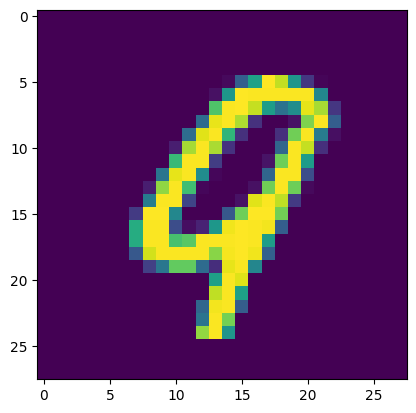

In [21]:
plt.imshow(x_train[2])

In [22]:
X_train = x_train.reshape(56000, 28, 28, 1)
X_test = x_test.reshape(14000, 28, 28, 1)

In [23]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Label baru
print(y_train_one_hot[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
import tensorflow as tf
mc = tf.keras.callbacks.ModelCheckpoint('mnist_digit.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [33]:
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10, callbacks = [mc])

Epoch 1/10
1750/1750 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9946
Epoch 1: val_loss improved from inf to 0.13029, saving model to mnist_digit.h5
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.1303 - val_accuracy: 0.9797
Epoch 2/10
1749/1750 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9957
Epoch 2: val_loss did not improve from 0.13029
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.1502 - val_accuracy: 0.9809
Epoch 3/10
1742/1750 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9959
Epoch 3: val_loss did not improve from 0.13029
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.1805 - val_accuracy: 0.9793
Epoch 4/10
1749/1750 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9960
Epoch 4: val_loss did not improve fr

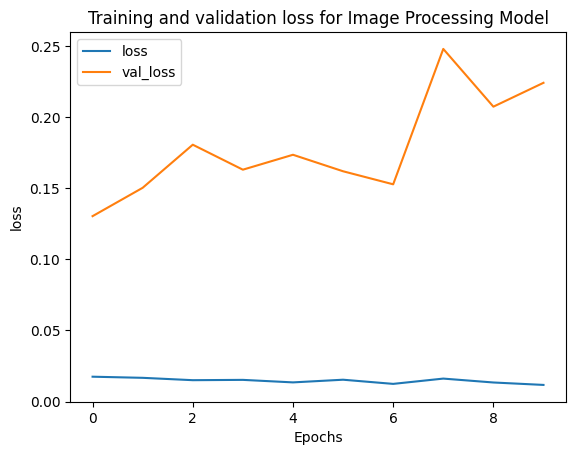

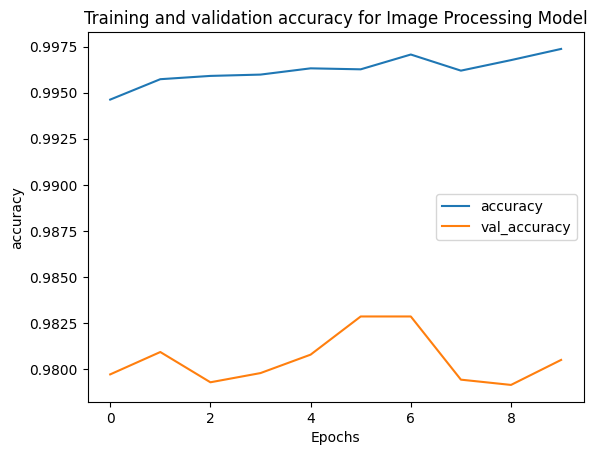

In [34]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.title(f'Training and validation {metric} for Image Processing Model')
    plt.show()
    
plot_graphs(hist, "loss")
plot_graphs(hist, "accuracy")

In [35]:
final_model = tf.keras.models.load_model('mnist_digit.h5')

In [42]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                                 
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
____________________________________________________

In [40]:
import tempfile
import os

MODEL_DIR = ''

export_path = os.path.join(MODEL_DIR)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets



export_path = 


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'mnist_digit.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\fawza\AppData\Local\Temp\tmpp48ggb9e\assets


INFO:tensorflow:Assets written to: C:\Users\fawza\AppData\Local\Temp\tmpp48ggb9e\assets
